In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.externals import joblib

import spdivik.summary as smr
smr.scale_plot_size(4.)

In [2]:
# root = r"C:\Users\Grzegorz\Desktop\thyroid-cancer-cores-merged-all"
root = r"E:\hnc-master-thesis\data_HNC_master_thesis"
result_path = os.path.join(root, "divik-result.jbl")
metadata_path = os.path.join(root, "metadata.csv")

In [23]:
metadata = pd.read_csv(metadata_path)
metadata = metadata[metadata.dataset == 1]
metadata.diagnosis[(metadata.diagnosis == 'connective') | (metadata.diagnosis == 'gland') | (metadata.diagnosis == 'muscle')] = 'healthy'
result = joblib.load(result_path)

In [24]:
smr.depth(result)

8

In [25]:
smr.total_number_of_clusters(result)

54

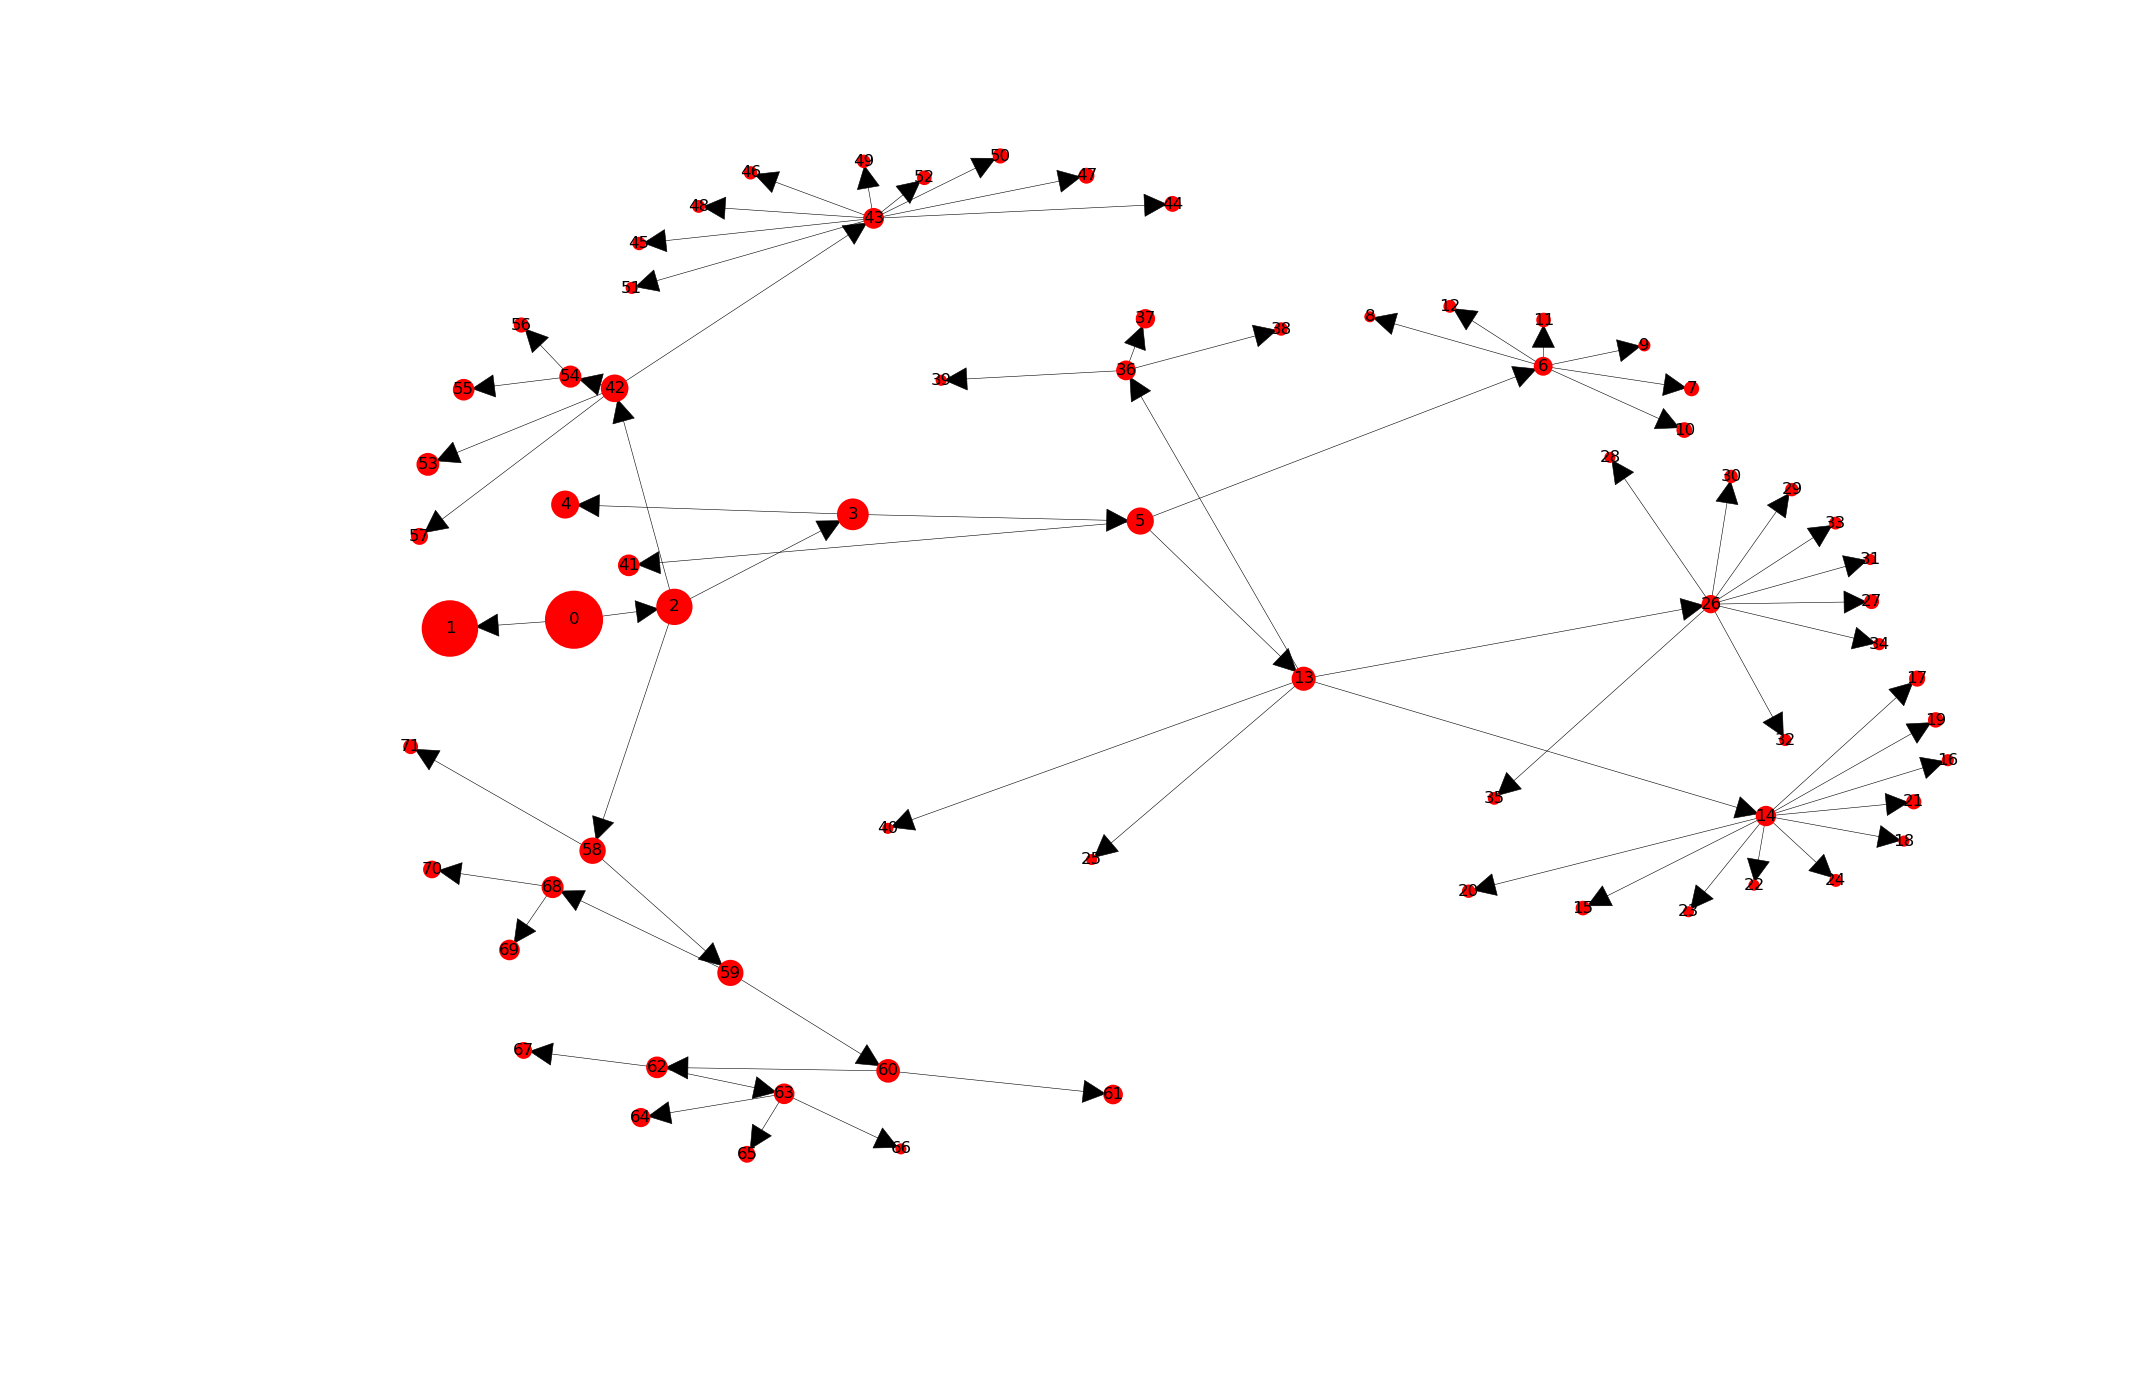

In [26]:
smr.plot(result)

In [27]:
def as_image(labels, x, y):
    x, y = np.array(x), np.array(y)
    x, y = x - x.min() + 1, y - y.min() + 1
    image = np.nan * np.zeros((y.max() + 1, x.max() + 1))
    image[y, x] = labels
    return image

['cancer' 'epithelium' 'healthy']


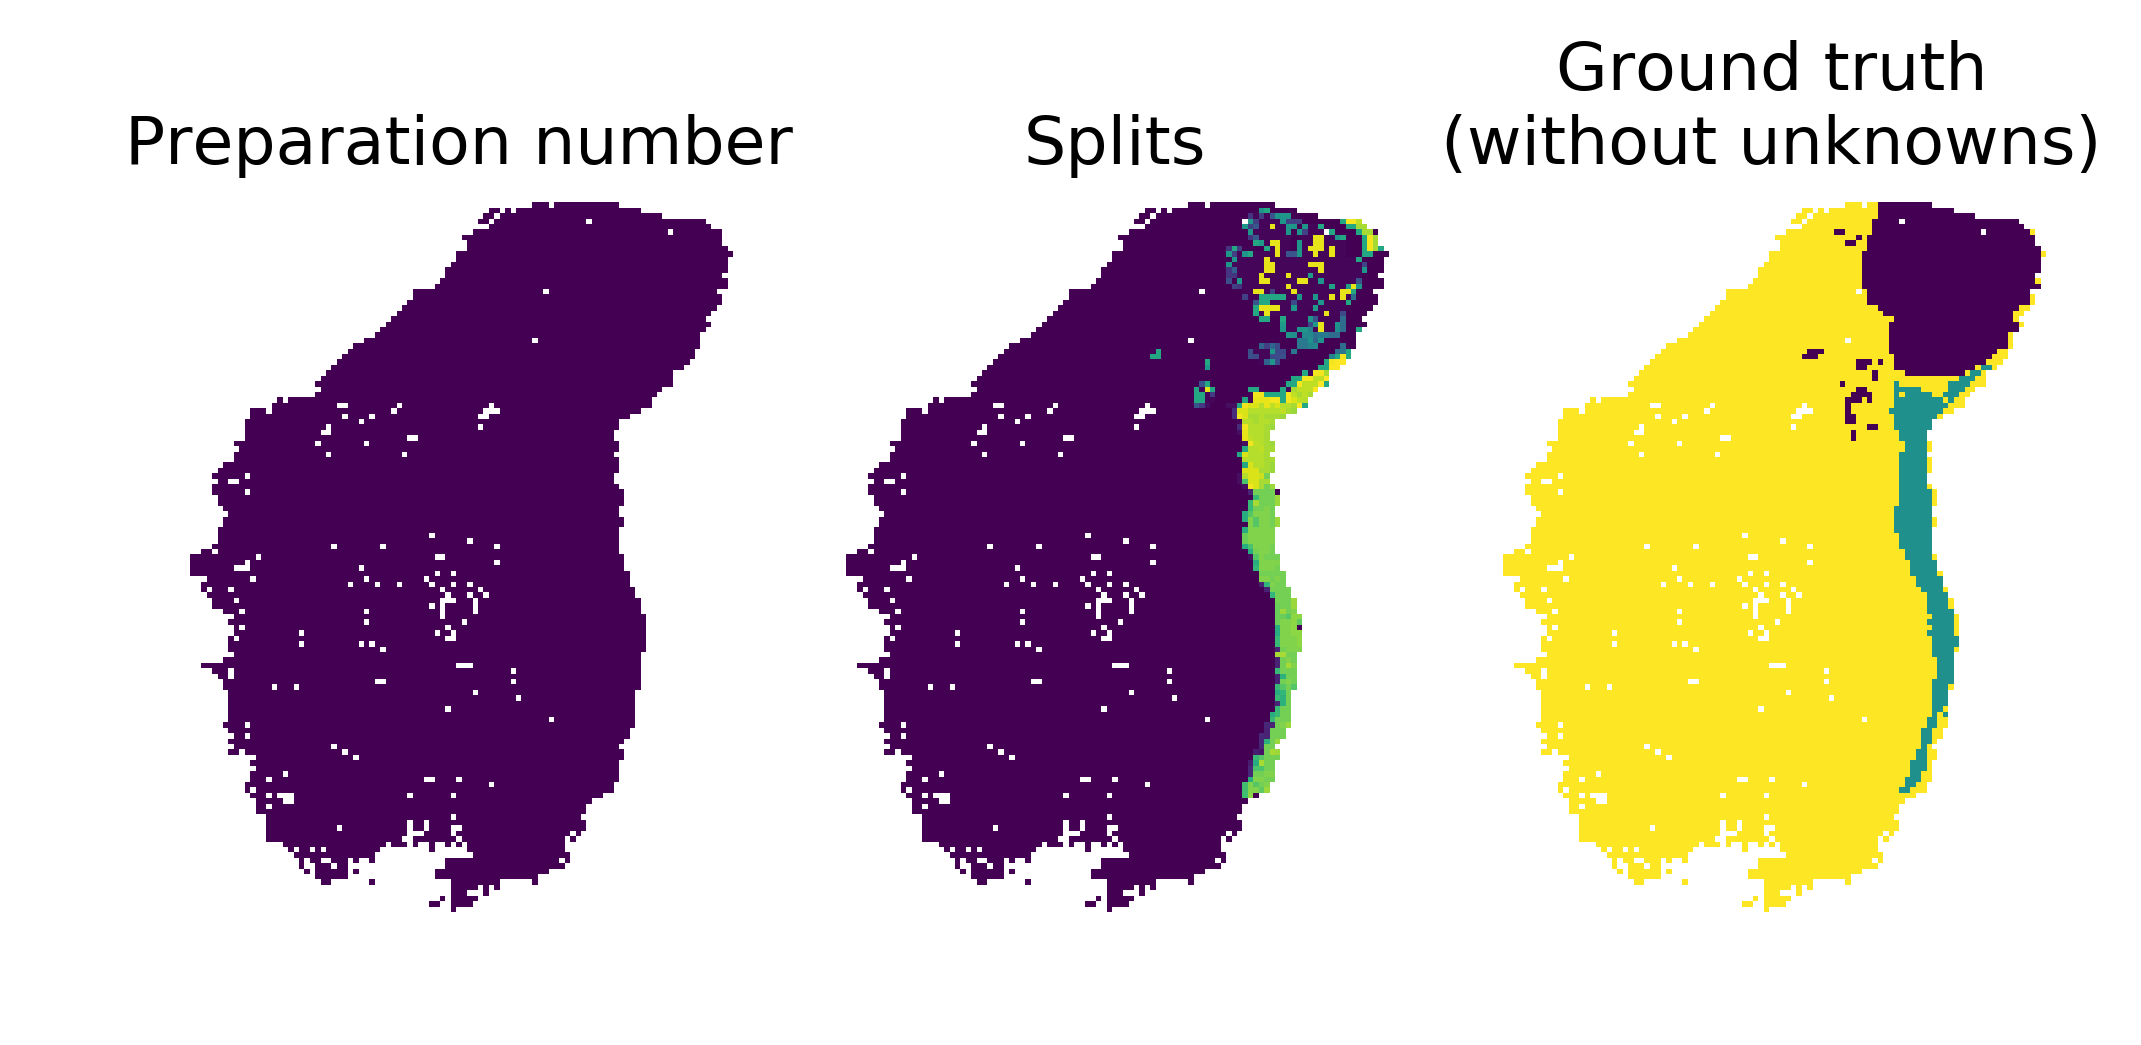

In [28]:
preparations = as_image(metadata.dataset, metadata.X, metadata.Y)

figure, axes = plt.subplots(1, 3)
axes[0].imshow(preparations)
axes[0].axis('off')
axes[0].set_title('Preparation number')

merged = smr.merged_partition(result)
# topmost = as_image(result.partition, metadata.X, metadata.Y)
topmost = as_image(merged, metadata.X, metadata.Y)

axes[1].imshow(topmost)
axes[1].axis('off')
axes[1].set_title('Splits')

diagnoses = np.unique(metadata.diagnosis)
print(diagnoses)
numerical_diagnosis = np.argmax(diagnoses[np.newaxis, :] == metadata.diagnosis[:, np.newaxis], axis=1).astype(float)
numerical_diagnosis[np.logical_or(metadata.diagnosis == '?', metadata.diagnosis == '????')] = np.nan
ground_truth = as_image(numerical_diagnosis, metadata.X, metadata.Y)
axes[2].imshow(ground_truth)
axes[2].axis('off')
axes[2].set_title('Ground truth\n(without unknowns)')

plt.show()

In [29]:
smr.statistic(merged, metadata.diagnosis, smr.dice)

,cancer,epithelium,healthy
0,0.091013,0.006194,0.963876
1,0.467087,0.009615,0.000849
2,0.000000,0.010870,0.002055
3,0.000000,0.005556,0.000000
4,0.000000,0.000000,0.000588
5,0.000000,0.043243,0.000881
6,0.000000,0.005464,0.001762
7,0.000000,0.011050,0.000294
8,0.016451,0.000000,0.000000
9,0.002364,0.000000,0.000294


In [30]:
smr.statistic(merged, metadata.diagnosis, smr.positive_predictive_value)

,cancer,epithelium,healthy
0,0.050941,0.003255,0.945804
1,0.977358,0.011321,0.011321
2,0.000000,0.222222,0.777778
3,0.000000,1.000000,0.000000
4,0.000000,0.000000,1.000000
5,0.000000,0.727273,0.272727
6,0.000000,0.142857,0.857143
7,0.000000,0.666667,0.333333
8,1.000000,0.000000,0.000000
9,0.500000,0.000000,0.500000


In [31]:
smr.statistic(merged, metadata.diagnosis, smr.true_positive_rate)

,cancer,epithelium,healthy
0,0.426540,0.064067,0.982652
1,0.306872,0.008357,0.000441
2,0.000000,0.005571,0.001029
3,0.000000,0.002786,0.000000
4,0.000000,0.000000,0.000294
5,0.000000,0.022284,0.000441
6,0.000000,0.002786,0.000882
7,0.000000,0.005571,0.000147
8,0.008294,0.000000,0.000000
9,0.001185,0.000000,0.000147


(array([3096.,  329.,  104.,   46.,   31.,   27.,   22.,   28.,   15.,
          16.]),
 array([6.92990943e-04, 8.92594086e-02, 1.77825826e-01, 2.66392244e-01,
        3.54958662e-01, 4.43525079e-01, 5.32091497e-01, 6.20657914e-01,
        7.09224332e-01, 7.97790750e-01, 8.86357167e-01]),
 <a list of 10 Patch objects>)

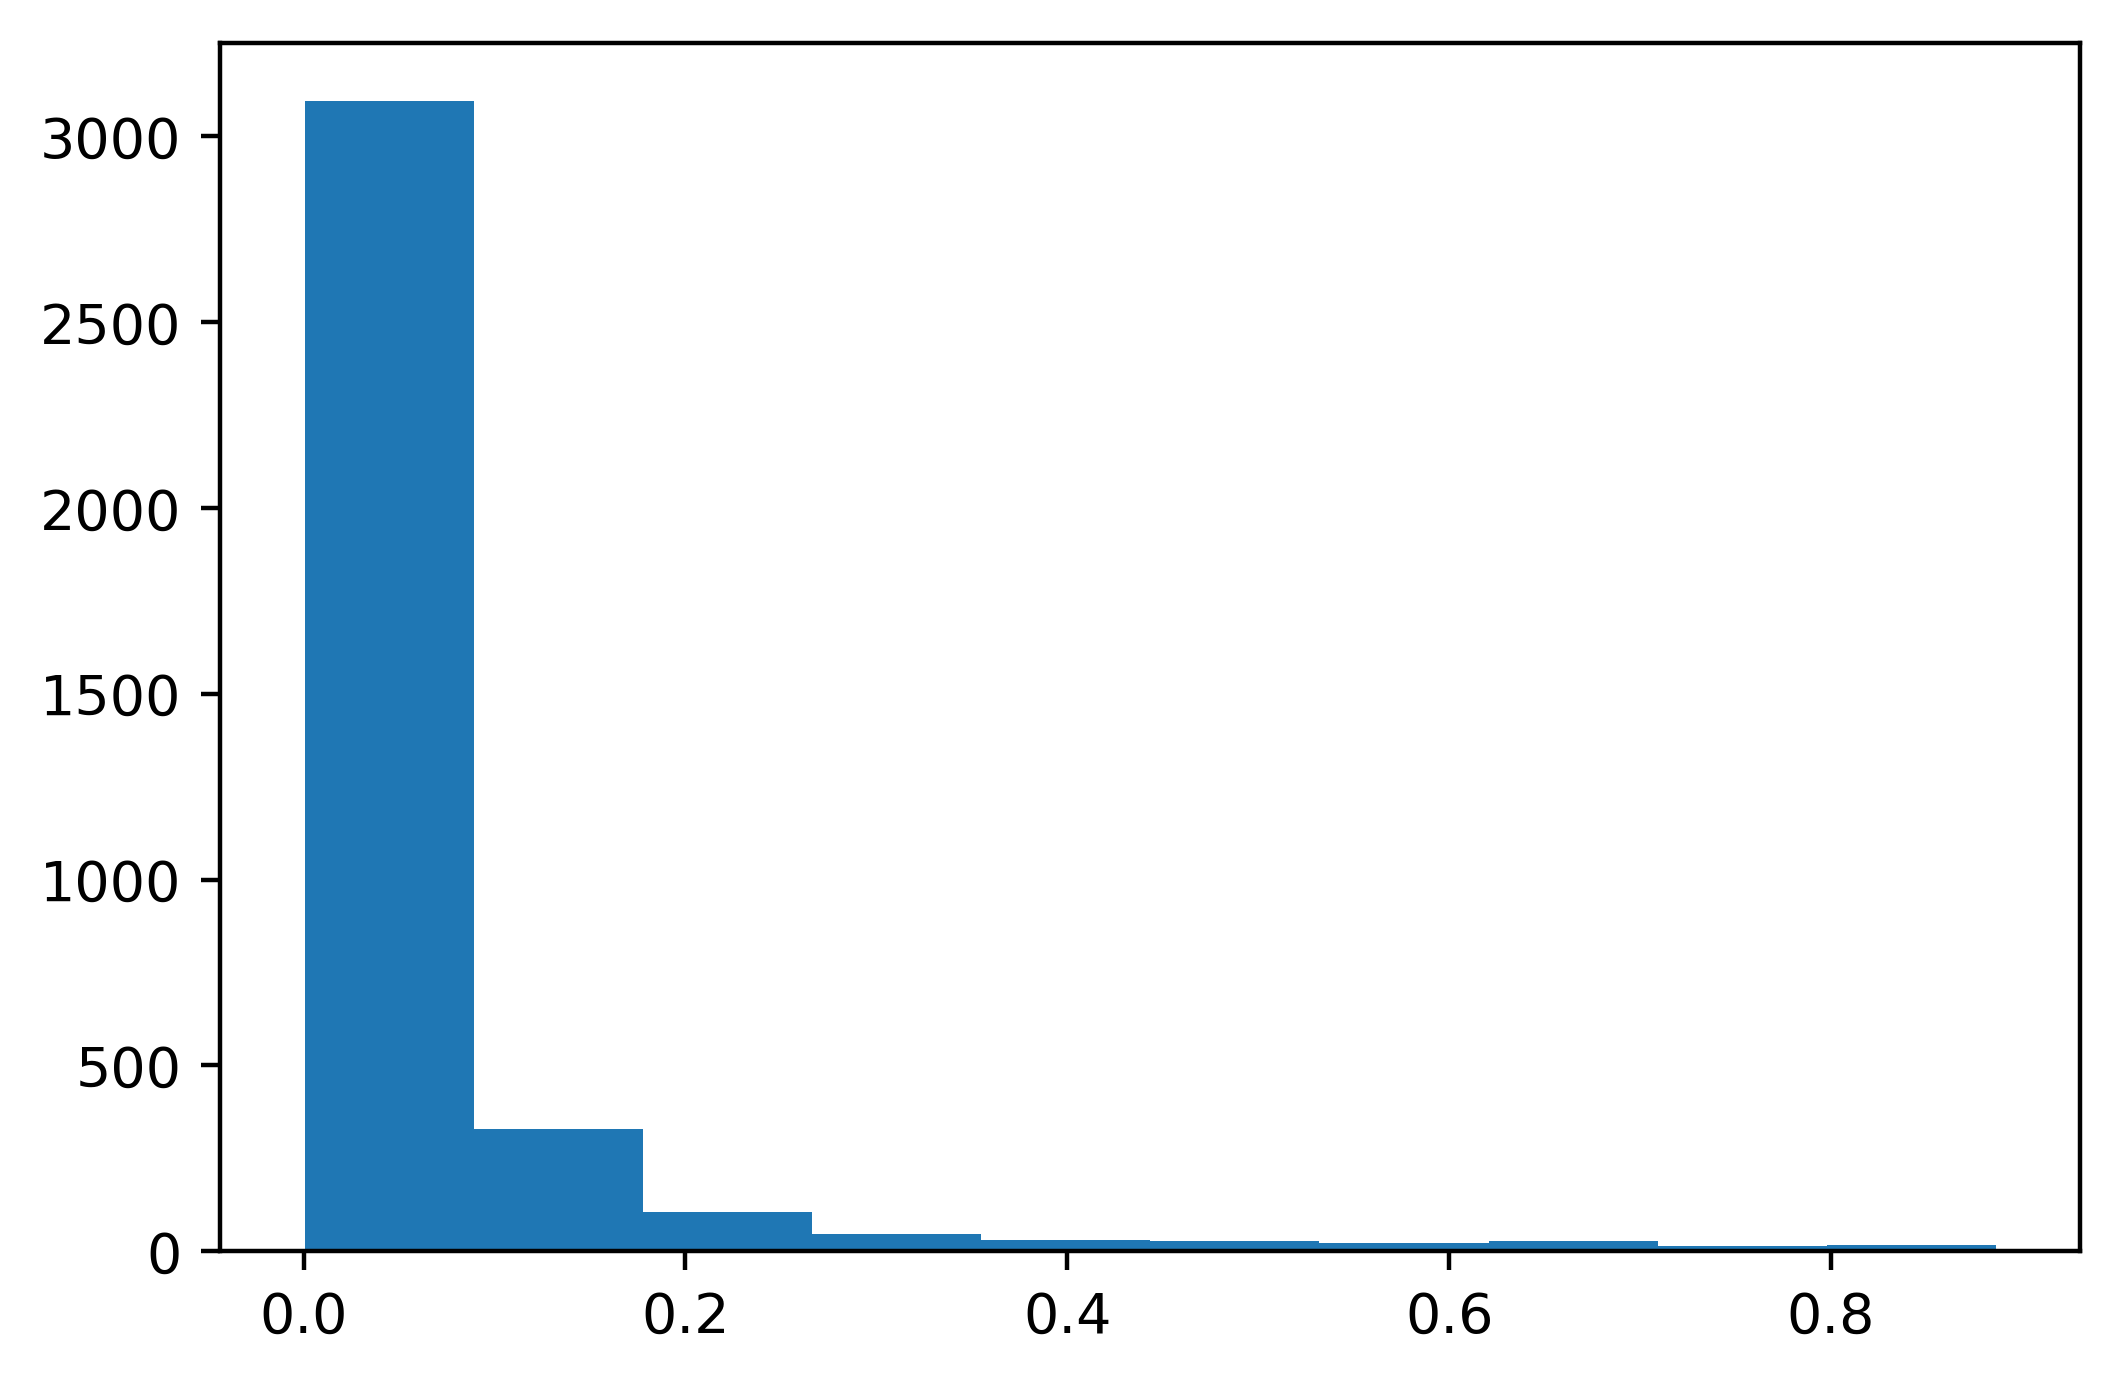

In [32]:
import spdivik.magic_anova as an

data = np.load(os.path.join(root, 'spectra.npy'))
data = data[:metadata.shape[0]]
groups = [group.values for _, group in pd.DataFrame(data).groupby(merged)]

def eta(*groups):
    return np.array([
        an.EffectSize(*[group[:, i] for group in groups])
        for i in range(groups[0].shape[1])
    ])

etas = eta(*groups)
plt.hist(etas)

(array([6.260e+02, 1.078e+03, 6.330e+02, 4.140e+02, 2.100e+02, 1.350e+02,
        9.300e+01, 7.500e+01, 5.200e+01, 4.600e+01, 3.200e+01, 3.100e+01,
        1.700e+01, 2.100e+01, 1.400e+01, 2.400e+01, 1.800e+01, 1.000e+01,
        9.000e+00, 1.000e+01, 1.000e+01, 7.000e+00, 5.000e+00, 5.000e+00,
        6.000e+00, 6.000e+00, 6.000e+00, 6.000e+00, 3.000e+00, 4.000e+00,
        8.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 6.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 3.000e+00,
        6.000e+00, 6.000e+00, 2.000e+00, 6.000e+00, 4.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 7.000e+00, 4.000e+00]),
 array([6.92990943e-04, 1.54540606e-02, 3.02151302e-02, 4.49761998e-02,
        5.97372694e-02, 7.44983390e-02, 8.92594086e-02, 1.04020478e-01,
        1.18781548e-01, 1.33542617e-01, 1.48303687e-01, 1.63064757e-01,
        1.77825826e-01, 1.92586896e-01, 2.

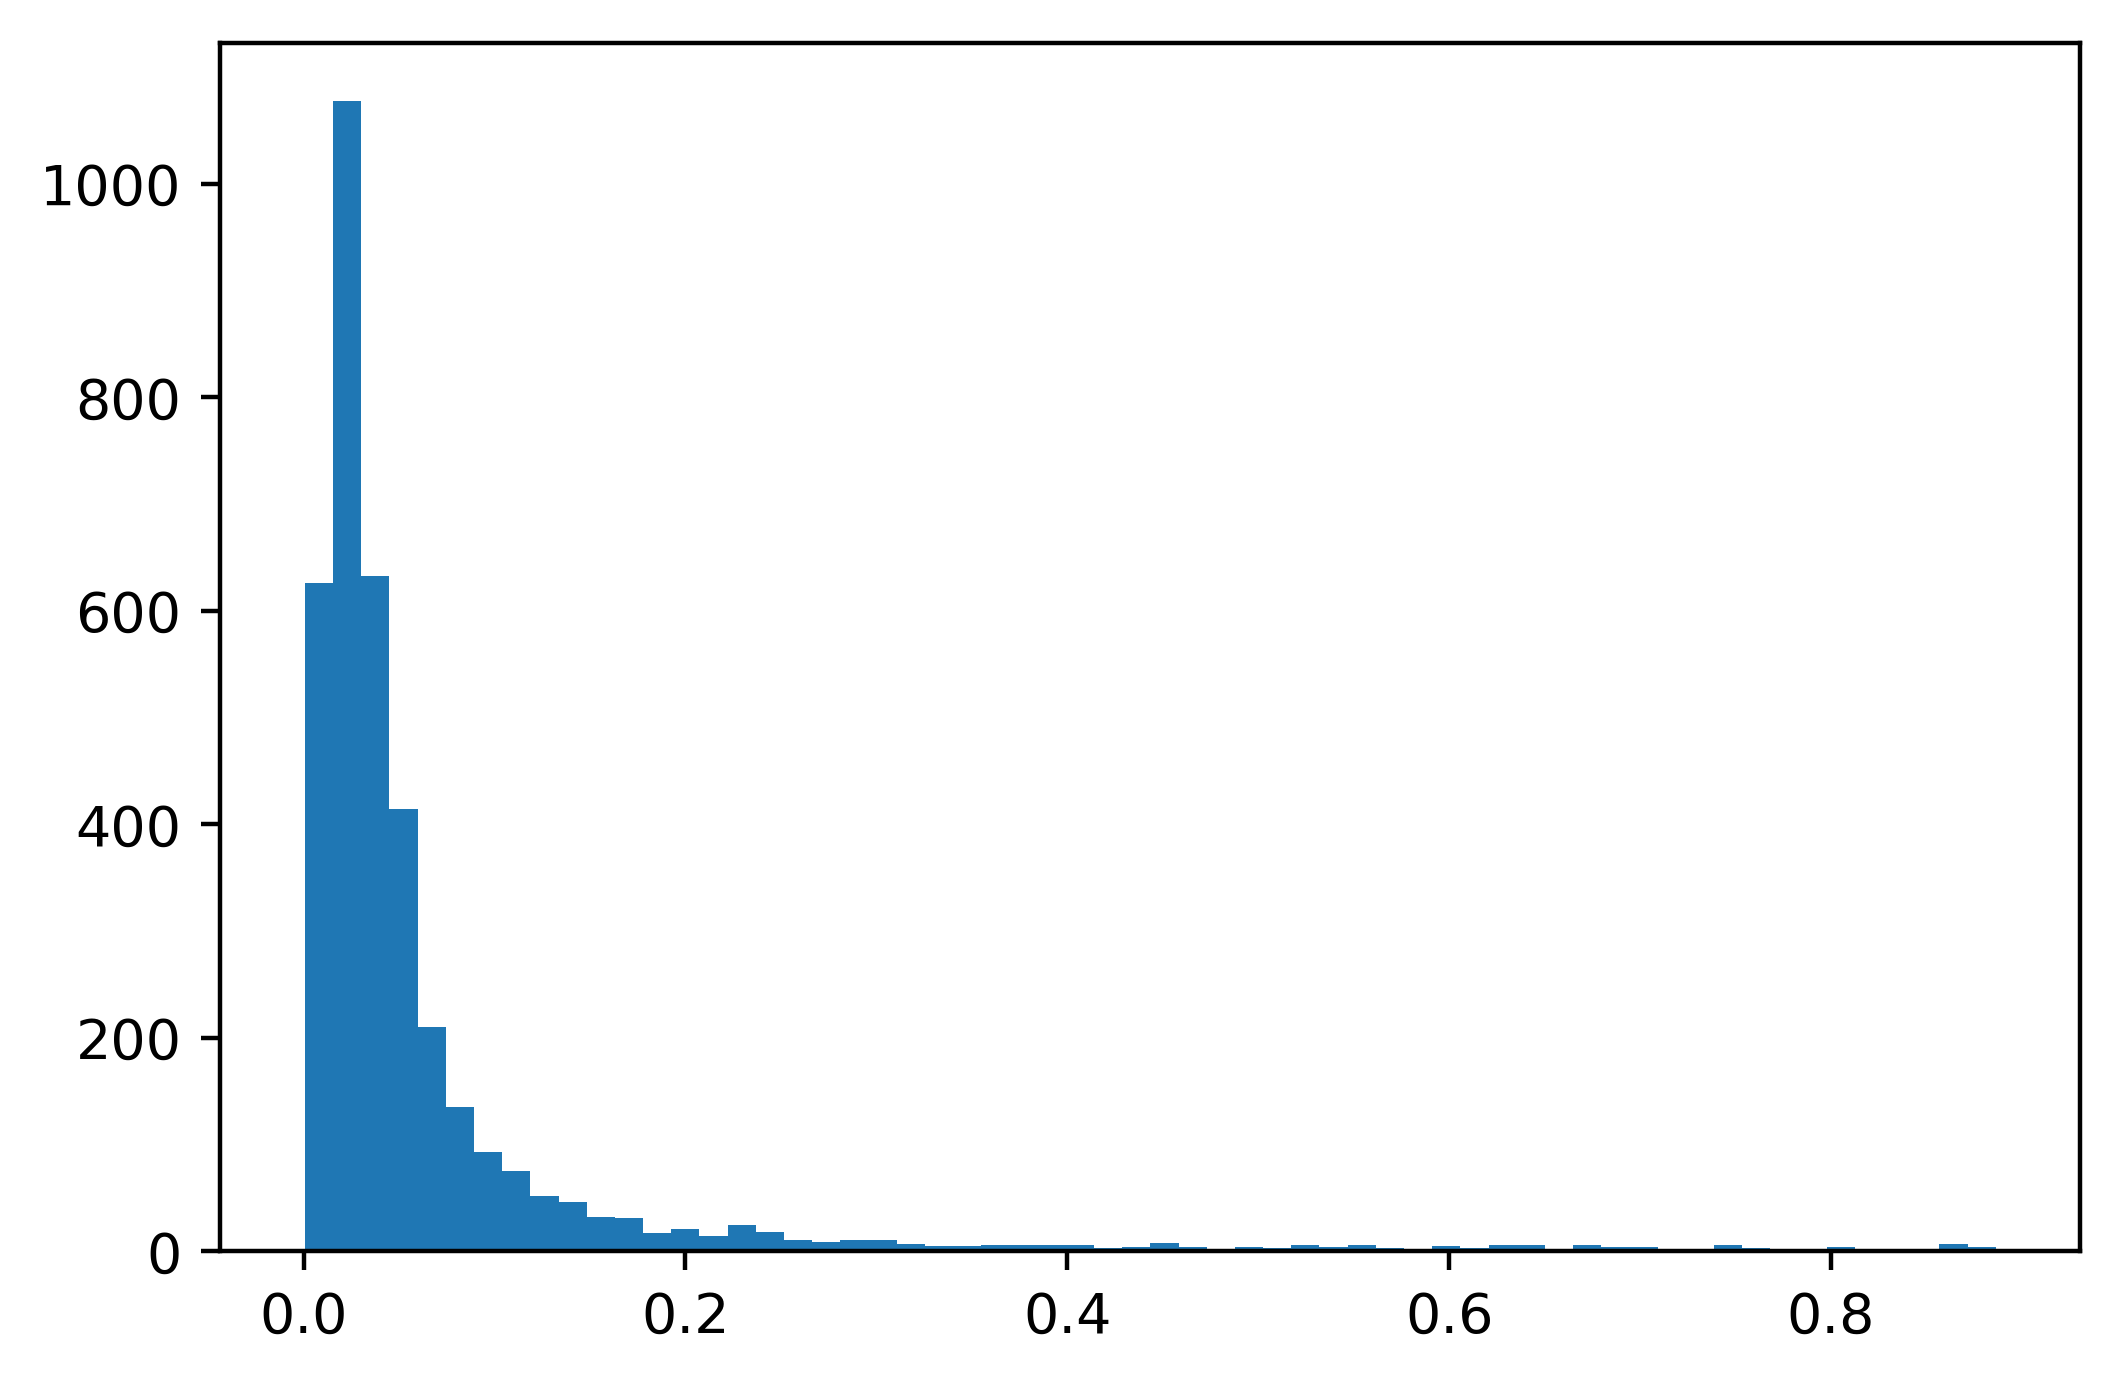

In [35]:
plt.hist(etas, bins=int(np.sqrt(etas.size)))

In [33]:
np.median(etas)

0.03303947753312626

In [34]:
pd.DataFrame({
    'at least small': [np.sum(etas > 0.02)],
    'at least medium': [np.sum(etas > .13)],
    'at least large': [np.sum(etas > .26)]
}, index=['effect size'])

,at least large,at least medium,at least small
effect size,189,411,2680
